# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


This part of the code installs the relavant libraries to run the code. These include numpy, matplotlib, pytorch, etc

In [109]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

This part of the code defines the relavant functions.

In [110]:
# pytorch function
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

# pytorch function
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

# plot function
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
  
# define function that pulls slides from google slides

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

# define function that pulls slides from google slides and exports them as images

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

# loads image

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

This part of the code gets labels from the aws link and guesses what it thinks the data is.

In [111]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [112]:
url = "https://docs.google.com/presentation/d/1Jtvyah9F-zp9Iaz5m04pR3FZOryShfvKdz9FQ6i46Yc/edit#slide=id.g19b8867b70f_0_173"

Here a for loop runs through the slides from google docs and prints out the images from the slides in a list and assignes them to the variable called images

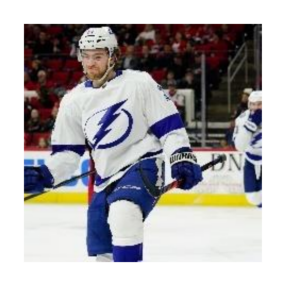

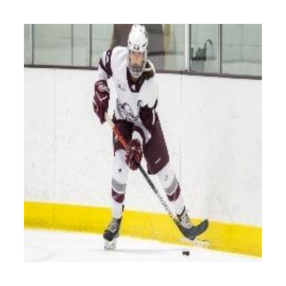

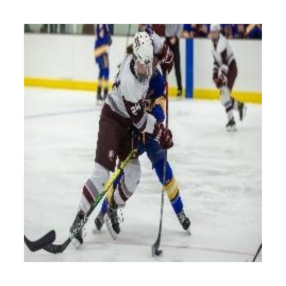

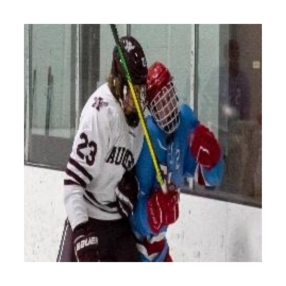

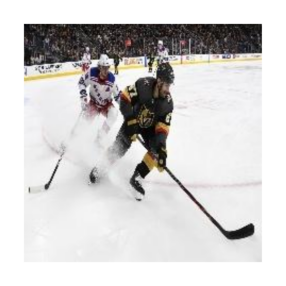

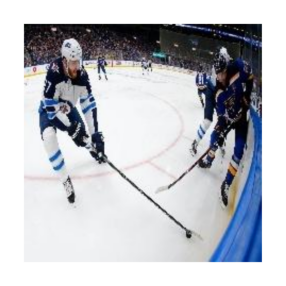

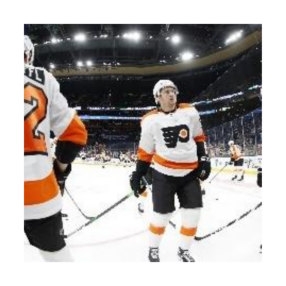

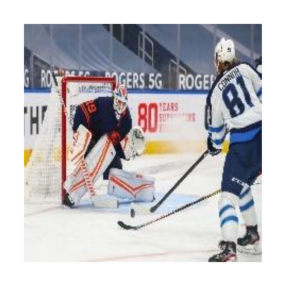

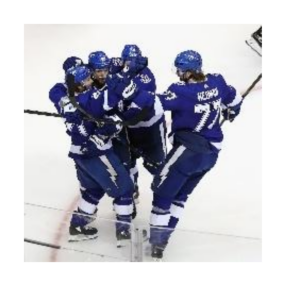

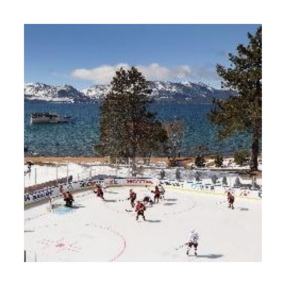

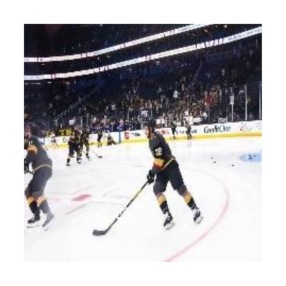

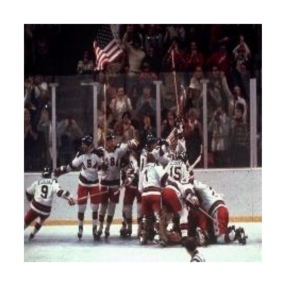

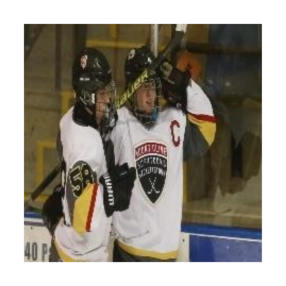

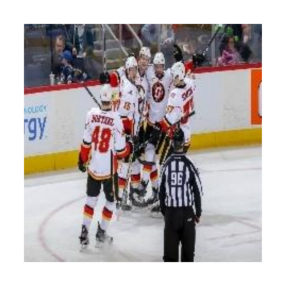

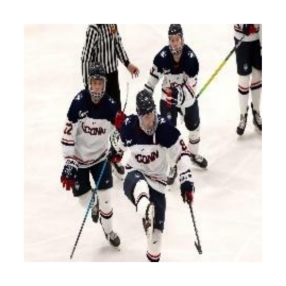

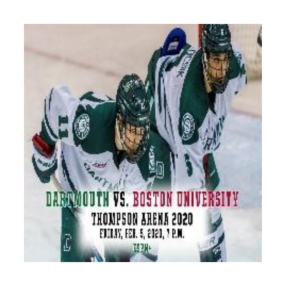

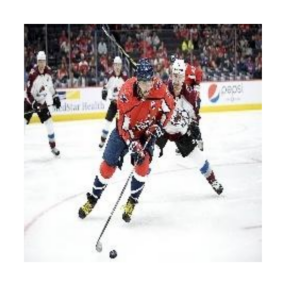

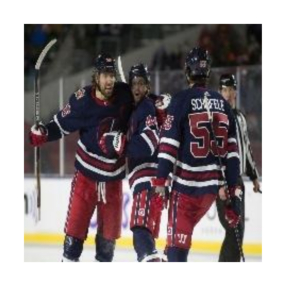

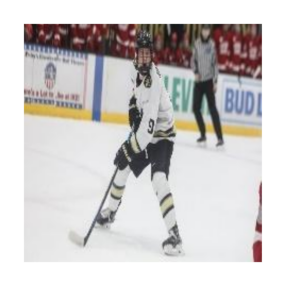

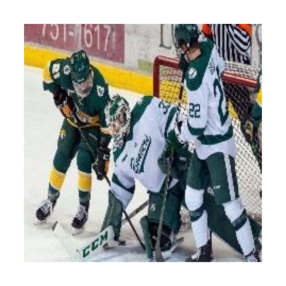

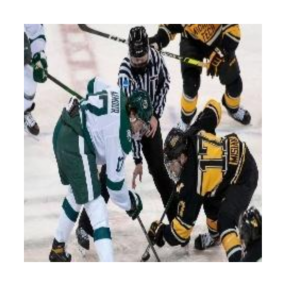

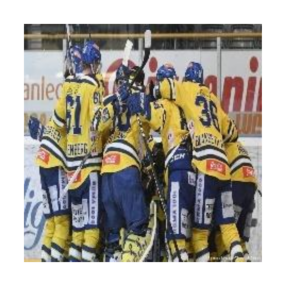

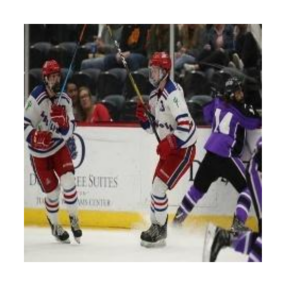

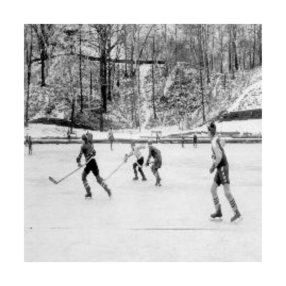

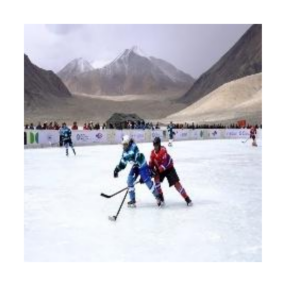

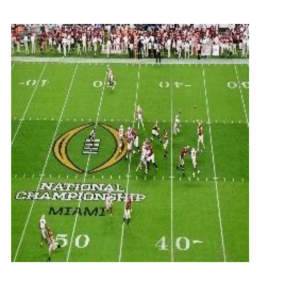

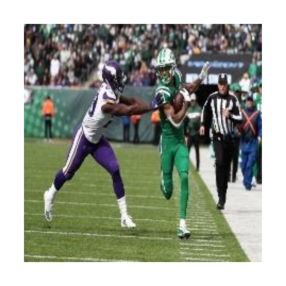

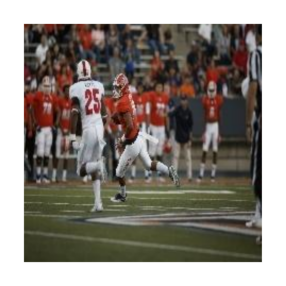

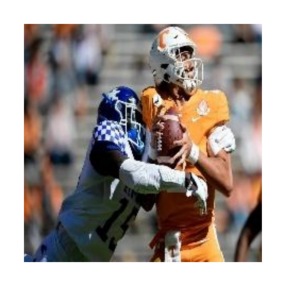

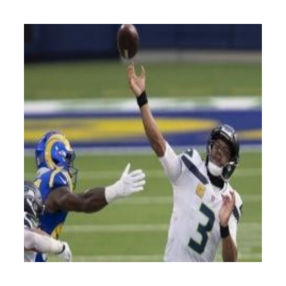

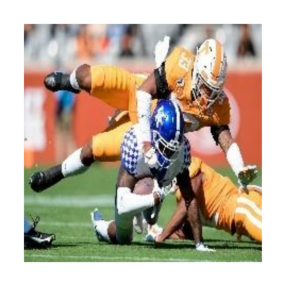

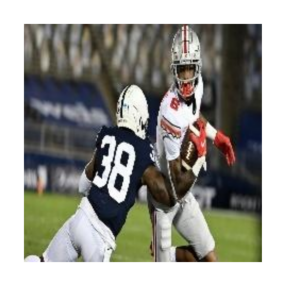

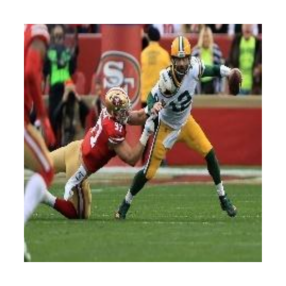

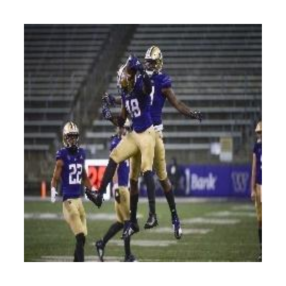

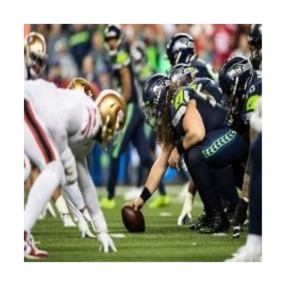

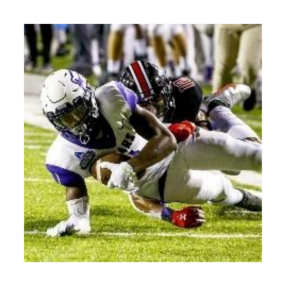

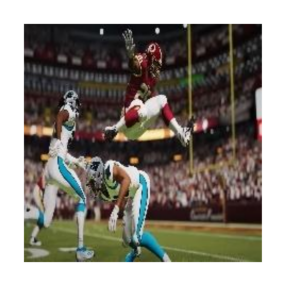

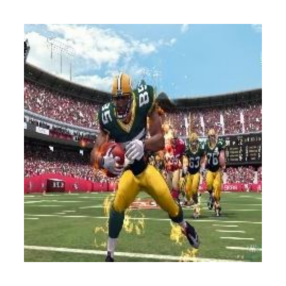

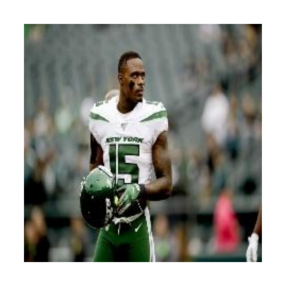

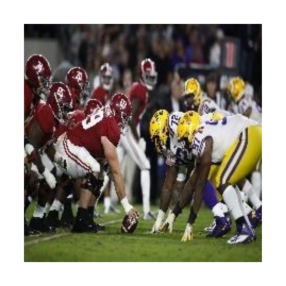

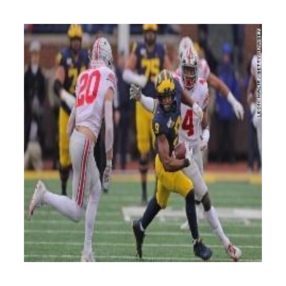

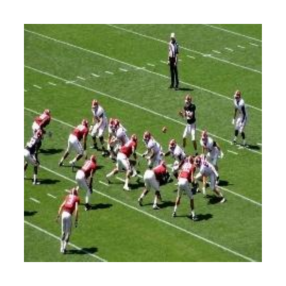

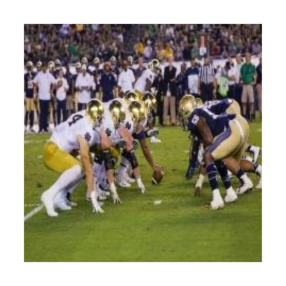

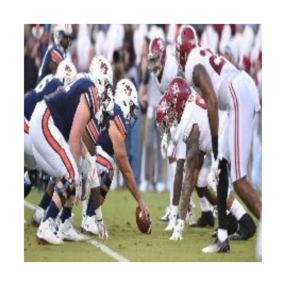

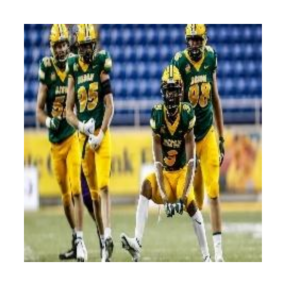

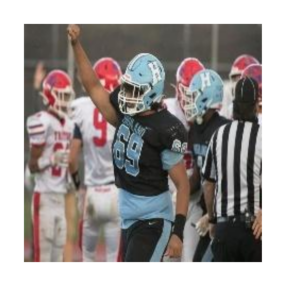

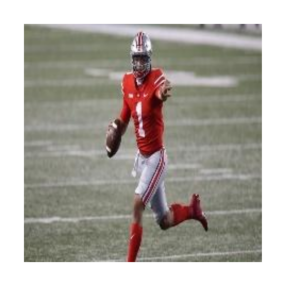

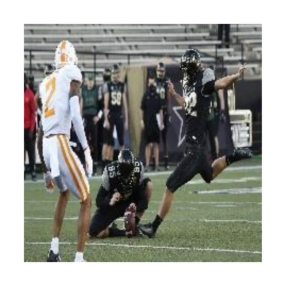

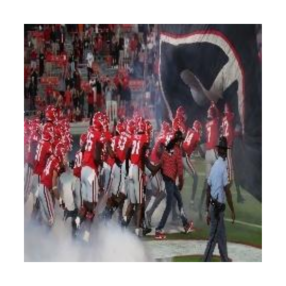

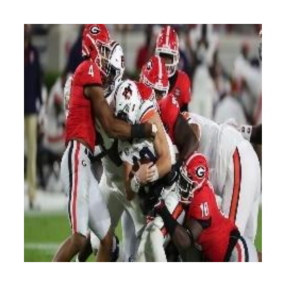

In [113]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [114]:
images.shape # shape of the tensor is ploted

torch.Size([50, 3, 224, 224])

In [115]:
model(images) 

tensor([[-2.8366e+00, -4.5912e+00,  6.5245e-03,  ..., -7.2149e+00,
          1.8511e+00,  1.2626e+00],
        [-4.6174e+00, -6.6828e+00, -6.6671e-01,  ..., -1.1265e+01,
          1.7979e+00,  1.2483e+00],
        [-4.6434e+00, -4.4886e+00,  1.5248e-01,  ..., -1.1370e+01,
         -6.5423e-01,  1.3346e+00],
        ...,
        [-1.2310e+00, -2.5212e+00, -2.7667e+00,  ..., -5.2673e+00,
          9.1048e-01, -1.6516e+00],
        [-1.9157e+00, -3.0261e-01, -1.1661e+00,  ..., -2.5135e+00,
         -4.7981e-01,  7.5885e-01],
        [-5.0882e+00,  2.2922e+00, -2.7334e+00,  ..., -2.5160e+00,
          1.6761e+00, -5.2509e-01]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [116]:
y = model(images) #assigns model(images) to y

In [117]:
y.shape # prints the shape of the tensor y

torch.Size([50, 1000])

In [118]:
guesses = torch.argmax(y, 1).cpu().numpy() # assigns the max argument to the guesses variable

Prints the list of possible guesses.

In [119]:
for i in list(guesses):
    print(labels[i])

puck, hockey puck
puck, hockey puck
puck, hockey puck
ski
ski
ski
puck, hockey puck
puck, hockey puck
ski
seashore, coast, seacoast, sea-coast
puck, hockey puck
dogsled, dog sled, dog sleigh
jersey, T-shirt, tee shirt
puck, hockey puck
puck, hockey puck
jersey, T-shirt, tee shirt
puck, hockey puck
bobsled, bobsleigh, bob
ski
ski
puck, hockey puck
comic book
puck, hockey puck
dogsled, dog sled, dog sleigh
ski
packet
scoreboard
scoreboard
television, television system
ballplayer, baseball player
television, television system
football helmet
television, television system
scoreboard
television, television system
papillon
horizontal bar, high bar
television, television system
horizontal bar, high bar
television, television system
parachute, chute
maypole
English foxhound
swimming trunks, bathing trunks
television, television system
television, television system
baseball
assault rifle, assault gun
television, television system
football helmet


In [120]:
Y = np.zeros(50,) # creates array out of zeros
Y[25:] = 1 # assigns the value of 1 to some of the elements

In [121]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
X = y.detach().cpu().numpy() 

In [123]:
X.shape # print the shape of X

(50, 1000)

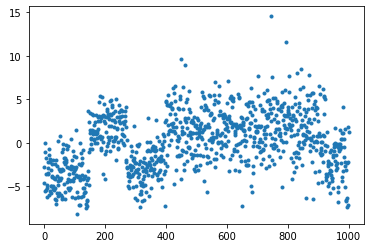

In [124]:
plt.plot(X[0],'.') # plot the data

In [125]:
X[0] 

array([-2.83658218e+00, -4.59118700e+00,  6.52448833e-03, -5.56265497e+00,
       -1.11916459e+00, -1.77131486e+00, -5.48580694e+00, -3.56631422e+00,
       -4.85258722e+00, -6.29258156e+00, -5.24879694e+00, -2.95771170e+00,
       -2.27152252e+00, -3.47451353e+00, -3.63519859e+00, -5.97205353e+00,
       -1.42268407e+00, -6.91665888e-01, -1.84150505e+00, -2.22806883e+00,
       -5.56283951e+00, -4.97067308e+00, -5.79342985e+00, -5.02050495e+00,
       -3.10598612e+00, -2.40459681e+00, -3.85181999e+00, -3.92564869e+00,
       -1.98360729e+00, -4.93578053e+00, -5.26965237e+00, -5.46147537e+00,
       -4.10075474e+00, -4.05265284e+00, -2.42908335e+00, -5.25091648e+00,
       -4.20010471e+00, -6.46146393e+00, -1.95022380e+00, -7.09007645e+00,
       -6.55153179e+00, -3.83012676e+00, -5.77490664e+00, -2.64223433e+00,
       -4.86589861e+00,  1.98918819e-01, -6.15847015e+00, -4.41579676e+00,
       -5.80509281e+00, -4.11240387e+00, -3.03889990e+00,  7.48693943e-01,
       -3.28776598e+00, -

In [126]:
np.argmax(X[0]) # give max argument

746

In [127]:
labels[948] # prints label from the list

'Granny Smith'

In [128]:
top_ten = np.argsort(X[0])[::-1][0:10] # assign top ten arguments to list

Prints the top 10 guesses for the labels dataset

In [129]:
for i in top_ten:
    print(labels[i])

puck, hockey puck
ski
bobsled, bobsleigh, bob
broom
swing
stretcher
tricycle, trike, velocipede
soccer ball
parallel bars, bars
punching bag, punch bag, punching ball, punchball


In [130]:
labels # print all labels in the list

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 42., 114., 198., 230., 240., 138.,  30.,   6.,   1.,   1.]),
 array([-8.185313 , -5.913147 , -3.640981 , -1.3688147,  0.9033514,
         3.1755176,  5.447684 ,  7.71985  ,  9.992016 , 12.264182 ,
        14.536348 ], dtype=float32),
 <a list of 10 Patch objects>)

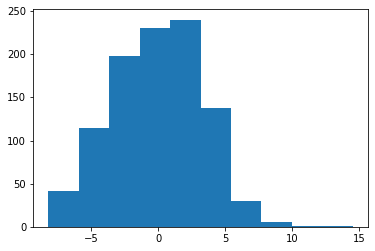

In [131]:
plt.hist(X[0]) # plot histogram

In [132]:
X = GPU_data(X)
Y = GPU_data(Y)

Initiation of PyTorch model begins here

In [133]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [134]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [135]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [136]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [137]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [138]:
X.shape # print X size

torch.Size([50, 1000])

In [139]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [140]:
def model(x,w):

    return x@w[0]

In [141]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

Here we train the model that guesses the photos

In [142]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-110-c0590edc8eec>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

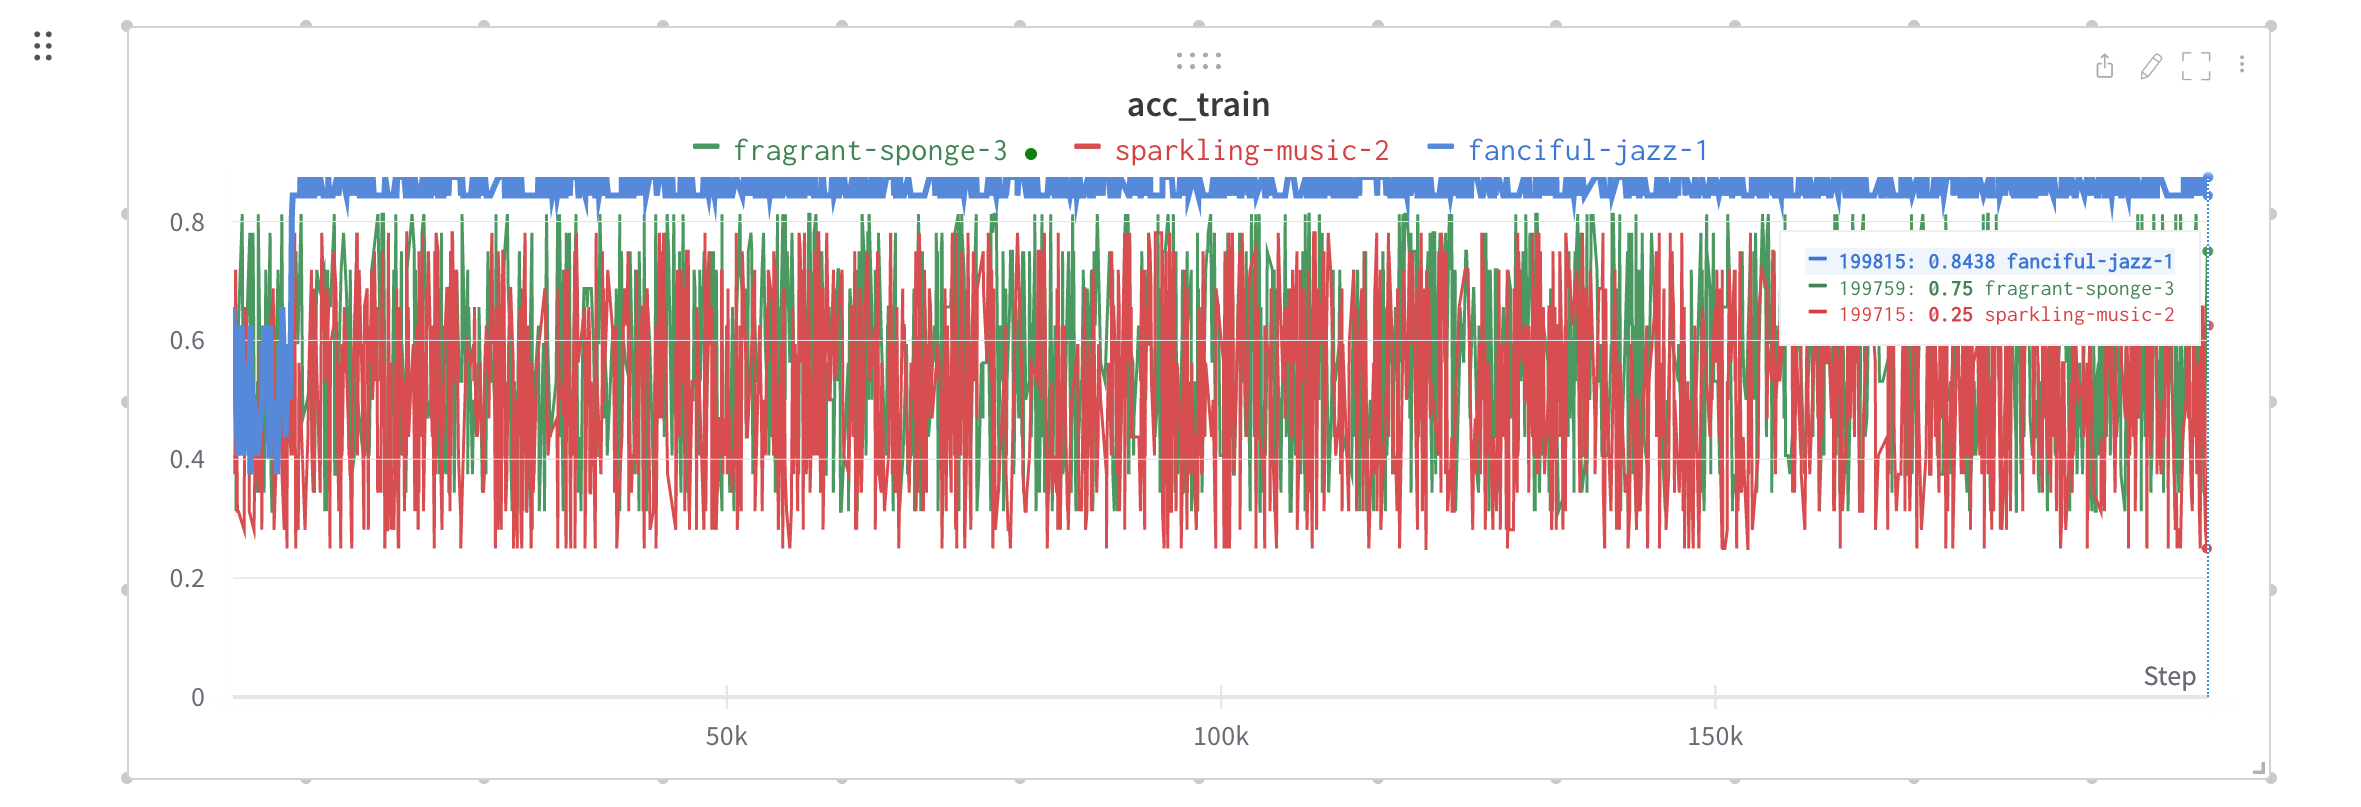

Above I ran the model three times. The graph above represents how well the model ran each of the three times it was experimented. The model works simular to how one may quiz themselves with flash cards. In brief the model uses a neural network to clssify shapes and associate them with what it has been taight those shapes are. My data set consisted of hockey and football players. After asining to the computer what "hockey" and "football" are through a range of data, the computer goes through each picture and guesses if the picture it is shown is in fact hockey or football. Since it already has been taught what each one is, it already knows the answer. From there on the model asses how well the computer did guessing the sport compared to what it actually is which it already knows. 

The blue data represents the first experiment which did very well averging a 0.8 on the Y axis. The next two runs in red and green didn't do as well in comparison and display the average of how well the model works. 